# EDA
### Rafael Takata García

EDA es Exploratory Data Analysis

In [2]:
import pandas as pd

df = pd.read_csv('../data/raw/mtcars.data', index_col='model')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


## Outliers

In [4]:
df.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [5]:
df.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [6]:
df.mode()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
IQR = Q3 -Q1
$$

In [7]:
IQR = df.mpg.quantile(.75)-df.mpg.quantile(0.25)
print('IQR:', IQR)

IQR: 7.375


$$
lower = Q1-1.5*IQR
$$
$$
upper = Q3+1.5*IQR
$$

In [8]:
lower = df.mpg.quantile(0.25) - 1.5*IQR
upper = df.mpg.quantile(0.75) +1.5*IQR
print(lower, upper)

4.362500000000001 33.8625


In [9]:
for i, car in enumerate(df['mpg']):
    if (car < lower) | (car >upper) :
        print('Outlier:', i, car, df.iloc[i])

Outlier: 19 33.9 mpg     33.900
cyl      4.000
disp    71.100
hp      65.000
drat     4.220
wt       1.835
qsec    19.900
vs       1.000
am       1.000
gear     4.000
carb     1.000
Name: Toyota Corolla, dtype: float64


### Measures of dispersion

In [10]:
df.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

<Axes: >

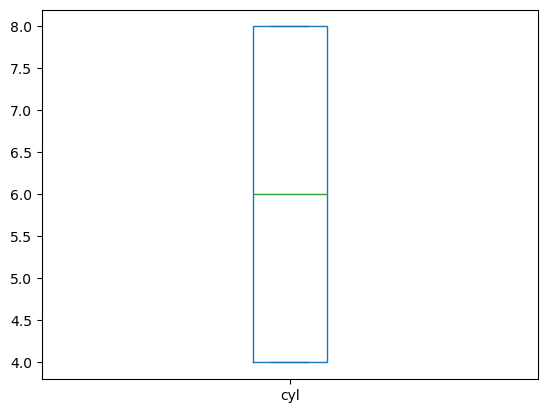

In [11]:
df['cyl'].plot(kind='box')

In [12]:
df.kurt()

mpg    -0.022006
cyl    -1.762794
disp   -1.067523
hp      0.275212
drat   -0.450432
wt      0.416595
qsec    0.864931
vs     -2.063273
am     -1.966550
gear   -0.895292
carb    2.020059
dtype: float64

In [13]:
df.skew()

mpg     0.672377
cyl    -0.192261
disp    0.420233
hp      0.799407
drat    0.292780
wt      0.465916
qsec    0.406347
vs      0.264542
am      0.400809
gear    0.582309
carb    1.157091
dtype: float64